In [2]:
import pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


df2, meta = pyreadstat.read_sav('C:/Users/saads/OneDrive/Desktop/saadUS.sav')
#df2, meta2 = pyreadstat.read_sav(r'C:\Users\90536\Downloads\saadUS1.sav')


In [197]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# UNIVARIATE FEATURE SELECTION
# drop target columns

from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np


data = pd.read_csv('C:/Users/saads/OneDrive/Desktop/saad5.csv', names=['PercentageHighSchool',
 'EnglishMarks',
 'MathsMarks',
 'PhysicsMarks',
 'ChemistryMarks',
 'BiologyMarks',
 'AccountingMarks',
 'ComputerMarks',
 'ComputerSkills',
 'ArtsSkills',
 'PsychologySkills',
 'MedicalSkills',
 'PoliticsSkills',
 'MedicalSkills2',
 'LawSkills',
 'ComputerSkills2',
 'BankingSkills',
 'BankingSkills2',
 'CGPA',
 'UniversityDepartment'])
features = ['PercentageHighSchool',
 'EnglishMarks',
 'MathsMarks',
 'PhysicsMarks',
 'ChemistryMarks',
 'BiologyMarks',
 'AccountingMarks',
 'ComputerMarks',
 'ComputerSkills',
 'ArtsSkills',
 'PsychologySkills',
 'MedicalSkills',
 'PoliticsSkills',
 'MedicalSkills2',
 'LawSkills',
 'ComputerSkills2',
 'BankingSkills',
 'BankingSkills2',
 'CGPA']


drop_cols=['UniversityDepartment']
X = data.drop(drop_cols, axis = 1) # X = independent columns (potential predictors)
y = data['UniversityDepartment'] # y = target column (what we want to predict)



In [198]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR


In [199]:
#estimator = SVR(kernel="linear")
#selector = RFE(estimator, n_features_to_select=12, step=1)
#selector = selector.fit(X, y)
#selector.support_
#Features = X.iloc[ : , selector.support_]
#FeaturesFound1 = Features.columns.tolist()
#FeaturesFound1

In [200]:

# feature extraction - Recursive Feature Elimination
#model = LogisticRegression(solver='lbfgs',max_iter=1000)
#rfe = RFE(model, 12)
#fit = rfe.fit(X, Y)
#print("\n\n Recursive Feature Elimination")
#print("Num Features: %d" % fit.n_features_)
#print("Selected Features: %s" % fit.support_)
#print("Feature Ranking: %s" % fit.ranking_)
#fit.support_
#Features = X.iloc[ : , fit.support_]
#FeaturesFound2= Features.columns
#FeaturesFound2.tolist()

In [201]:
rf_model = RandomForestClassifier()
rf_model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [202]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances

PercentageHighSchool    0.037646
EnglishMarks            0.038625
MathsMarks              0.067193
PhysicsMarks            0.054079
ChemistryMarks          0.049789
BiologyMarks            0.057561
AccountingMarks         0.066803
ComputerMarks           0.055960
ComputerSkills          0.057623
ArtsSkills              0.044909
PsychologySkills        0.032016
MedicalSkills           0.050066
PoliticsSkills          0.056465
MedicalSkills2          0.070959
LawSkills               0.042934
ComputerSkills2         0.072957
BankingSkills           0.054153
BankingSkills2          0.056201
CGPA                    0.034062
dtype: float64

In [203]:
# determine 12 most important features
df_imp_feat = feat_importances.nlargest(12)
# print(rf_model.feature_importances_)
#df_columns = pd.DataFrame(df_imp_feat)
#df_columns
a = df_imp_feat.keys()
SelectedFeatures = a.tolist()
SelectedFeatures


['ComputerSkills2',
 'MedicalSkills2',
 'MathsMarks',
 'AccountingMarks',
 'ComputerSkills',
 'BiologyMarks',
 'PoliticsSkills',
 'BankingSkills2',
 'ComputerMarks',
 'BankingSkills',
 'PhysicsMarks',
 'MedicalSkills']

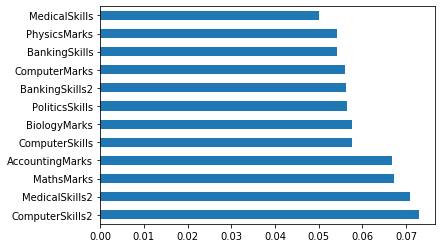

ComputerSkills2    0.072957
MedicalSkills2     0.070959
MathsMarks         0.067193
AccountingMarks    0.066803
ComputerSkills     0.057623
BiologyMarks       0.057561
PoliticsSkills     0.056465
BankingSkills2     0.056201
ComputerMarks      0.055960
BankingSkills      0.054153
PhysicsMarks       0.054079
MedicalSkills      0.050066
dtype: float64


In [204]:
# plot 12 most important features
# feat_importances.nlargest(12).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

In [205]:
#2nd FEATURE EXTRACTION METHOD:

# instantiate SelectKBest to determine 12 best features
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(X,y)


In [206]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)


In [207]:
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)

feature_scores.columns = ['Feature_Name','Score']  # name output columns
feature_scores


,Feature_Name,Score
0,PercentageHighSchool,3.043389
1,EnglishMarks,1.833406
2,MathsMarks,5.969532
3,PhysicsMarks,8.843998
4,ChemistryMarks,5.710792
5,BiologyMarks,5.466573
6,AccountingMarks,3.820635
7,ComputerMarks,6.373419
8,ComputerSkills,3.755866
9,ArtsSkills,1.302640


In [208]:
print(feature_scores.nlargest(10,'Score'))  # print 10 best features


       Feature_Name     Score
3      PhysicsMarks  8.843998
17   BankingSkills2  6.877274
7     ComputerMarks  6.373419
2        MathsMarks  5.969532
4    ChemistryMarks  5.710792
5      BiologyMarks  5.466573
13   MedicalSkills2  4.336064
6   AccountingMarks  3.820635
8    ComputerSkills  3.755866
12   PoliticsSkills  3.226971


In [209]:
# export selected features to .csv
df_univ_feat = feature_scores.nlargest(10,'Score')
SelectedColumns = df_univ_feat["Feature_Name"].values.tolist()
SelectedColumns


['PhysicsMarks',
 'BankingSkills2',
 'ComputerMarks',
 'MathsMarks',
 'ChemistryMarks',
 'BiologyMarks',
 'MedicalSkills2',
 'AccountingMarks',
 'ComputerSkills',
 'PoliticsSkills']

In [210]:
df2


,PercentageHighSchool,EnglishMarks,MathsMarks,PhysicsMarks,ChemistryMarks,BiologyMarks,AccountingMarks,ComputerMarks,ComputerSkills,ArtsSkills,PsychologySkills,MedicalSkills,PoliticsSkills,MedicalSkills2,LawSkills,ComputerSkills2,BankingSkills,BankingSkills2,CGPA,UniversityDepartment
0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,5.0,3.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0
1,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
2,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
3,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
4,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0,5.0,1.0,5.0,4.0,5.0,2.0,3.0,1.0,2.0,4.0,3.0,6.0
146,3.0,3.0,5.0,3.0,1.0,3.0,5.0,4.0,5.0,1.0,5.0,4.0,5.0,3.0,4.0,1.0,4.0,4.0,5.0,6.0
147,3.0,4.0,5.0,5.0,3.0,4.0,4.0,4.0,1.0,5.0,5.0,5.0,2.0,2.0,3.0,5.0,2.0,2.0,4.0,3.0
148,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,7.0


In [211]:
null_columns=df2.columns[df2.isnull().any()]
df2[null_columns].isnull().sum()

EnglishMarks        2
PhysicsMarks        4
ChemistryMarks      6
BiologyMarks       31
AccountingMarks    23
ComputerMarks      19
dtype: int64

In [212]:
data=df2.apply (pd.to_numeric, errors='coerce')
data=df2.fillna(0)

df2.update(data)
df2



,PercentageHighSchool,EnglishMarks,MathsMarks,PhysicsMarks,ChemistryMarks,BiologyMarks,AccountingMarks,ComputerMarks,ComputerSkills,ArtsSkills,PsychologySkills,MedicalSkills,PoliticsSkills,MedicalSkills2,LawSkills,ComputerSkills2,BankingSkills,BankingSkills2,CGPA,UniversityDepartment
0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,5.0,3.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0
1,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
2,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
3,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
4,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,4.0,2.0,5.0,5.0,4.0,4.0,4.0,2.0,3.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0,5.0,1.0,5.0,4.0,5.0,2.0,3.0,1.0,2.0,4.0,3.0,6.0
146,3.0,3.0,5.0,3.0,1.0,3.0,5.0,4.0,5.0,1.0,5.0,4.0,5.0,3.0,4.0,1.0,4.0,4.0,5.0,6.0
147,3.0,4.0,5.0,5.0,3.0,4.0,4.0,4.0,1.0,5.0,5.0,5.0,2.0,2.0,3.0,5.0,2.0,2.0,4.0,3.0
148,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,7.0


In [213]:
null_columns=df2.columns[df2.isnull().any()]
df2[null_columns].isnull().sum()

Series([], dtype: float64)

In [214]:
categorical_features=[feature for feature in df2.columns if df2[feature].dtype=='O']
categorical_features

[]

In [215]:
categorical_features2=df2.select_dtypes(include=np.number).columns.tolist()
categorical_features2

['PercentageHighSchool',
 'EnglishMarks',
 'MathsMarks',
 'PhysicsMarks',
 'ChemistryMarks',
 'BiologyMarks',
 'AccountingMarks',
 'ComputerMarks',
 'ComputerSkills',
 'ArtsSkills',
 'PsychologySkills',
 'MedicalSkills',
 'PoliticsSkills',
 'MedicalSkills2',
 'LawSkills',
 'ComputerSkills2',
 'BankingSkills',
 'BankingSkills2',
 'CGPA',
 'UniversityDepartment']

In [216]:
df2.describe(include='all')

,PercentageHighSchool,EnglishMarks,MathsMarks,PhysicsMarks,ChemistryMarks,BiologyMarks,AccountingMarks,ComputerMarks,ComputerSkills,ArtsSkills,PsychologySkills,MedicalSkills,PoliticsSkills,MedicalSkills2,LawSkills,ComputerSkills2,BankingSkills,BankingSkills2,CGPA,UniversityDepartment
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,3.273333,3.440000,3.480000,3.220000,2.920000,2.513333,2.726667,3.146667,4.080000,2.993333,4.140000,3.626667,3.173333,2.793333,2.840000,2.906667,3.053333,3.606667,3.933333,3.266667
std,1.140450,1.217766,1.364556,1.304972,1.397601,1.782603,1.596543,1.635950,1.013466,1.245107,1.029954,1.126536,1.145441,1.307165,1.204466,1.317648,1.202830,1.180926,0.909802,2.395932
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,4.000000,2.000000,4.000000,3.000000,2.250000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000
50%,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.500000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,6.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000


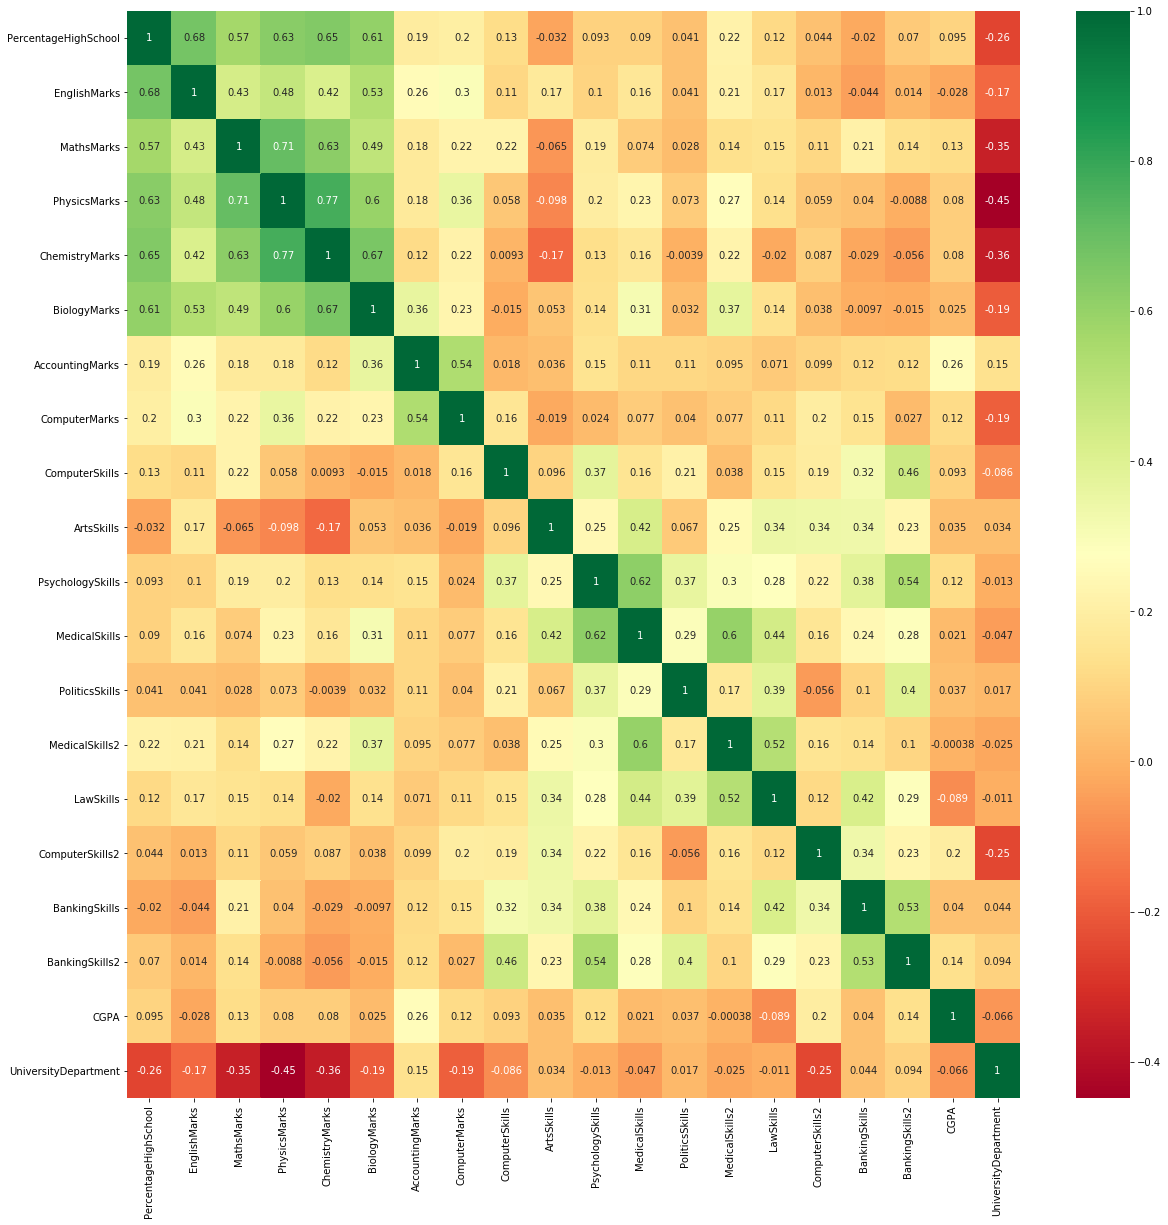

In [217]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# From first Feature Extraction Method, Found best Features which give high accuracy .Saved those features in the variable named BestSelectedFeatures (AS SHOWN BELOW)

In [218]:
#X = df2[SelectedColumns]
BestSelectedFeatures =['ComputerSkills2',
 'MedicalSkills2',
 'BankingSkills2',
 'MathsMarks',
 'PhysicsMarks',
 'ComputerMarks',
 'BiologyMarks',
 'AccountingMarks',
 'ComputerSkills',
 'LawSkills',
 'ChemistryMarks',
 'PoliticsSkills']
X = df2[BestSelectedFeatures]

#a = pd.DataFrame(BestSelectedFeatures)
#b=pd.DataFrame(FeaturesFound1)
#c =pd.DataFrame(FeaturesFound2)
#k = pd.concat([a ,b , c],axis = 1)
#k

In [219]:
Y = df2['UniversityDepartment']

In [220]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn import tree

In [221]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)



In [222]:
#scaler = StandardScaler()

# Fit on training set only.
#scaler.fit(X_train)

In [223]:
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)


In [224]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=10)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [225]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=10)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [226]:
#clf_gini.predict([3, 3, 1, 1])
X_test.shape

(45, 12)

In [227]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1., 1., 1., 1., 6., 1., 1., 1., 1., 1., 1., 6., 1., 1., 6., 1., 1.,
       6., 1., 6., 6., 1., 1., 6., 1., 1., 6., 1., 1., 1., 6., 1., 1., 1.,
       1., 1., 1., 6., 1., 1., 1., 1., 1., 6., 1.])

In [228]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)


Accuracy is  62.22222222222222


[Text(413.3333333333333, 792.75, 'X[3] <= 4.0\ngini = 1.0\nsamples = 105\nvalue = [53, 2, 9, 6, 32, 3]'),
 Text(206.66666666666666, 566.25, 'X[7] <= 2.0\ngini = 1.0\nsamples = 71\nvalue = [28, 2, 3, 6, 29, 3]'),
 Text(103.33333333333333, 339.75, 'gini = 1.0\nsamples = 15\nvalue = [9, 0, 2, 2, 0, 2]'),
 Text(310.0, 339.75, 'X[2] <= 4.0\ngini = 1.0\nsamples = 56\nvalue = [19, 2, 1, 4, 29, 1]'),
 Text(206.66666666666666, 113.25, 'gini = 1.0\nsamples = 23\nvalue = [11, 0, 1, 3, 8, 0]'),
 Text(413.3333333333333, 113.25, 'gini = 1.0\nsamples = 33\nvalue = [8, 2, 0, 1, 21, 1]'),
 Text(620.0, 566.25, 'X[2] <= 4.0\ngini = 0.0\nsamples = 34\nvalue = [25, 0, 6, 0, 3, 0]'),
 Text(516.6666666666666, 339.75, 'gini = 0.0\nsamples = 13\nvalue = [7, 0, 6, 0, 0, 0]'),
 Text(723.3333333333333, 339.75, 'X[0] <= 2.0\ngini = 0.0\nsamples = 21\nvalue = [18, 0, 0, 0, 3, 0]'),
 Text(620.0, 113.25, 'gini = 0.0\nsamples = 10\nvalue = [7, 0, 0, 0, 3, 0]'),
 Text(826.6666666666666, 113.25, 'gini = 0.0\nsamples = 1

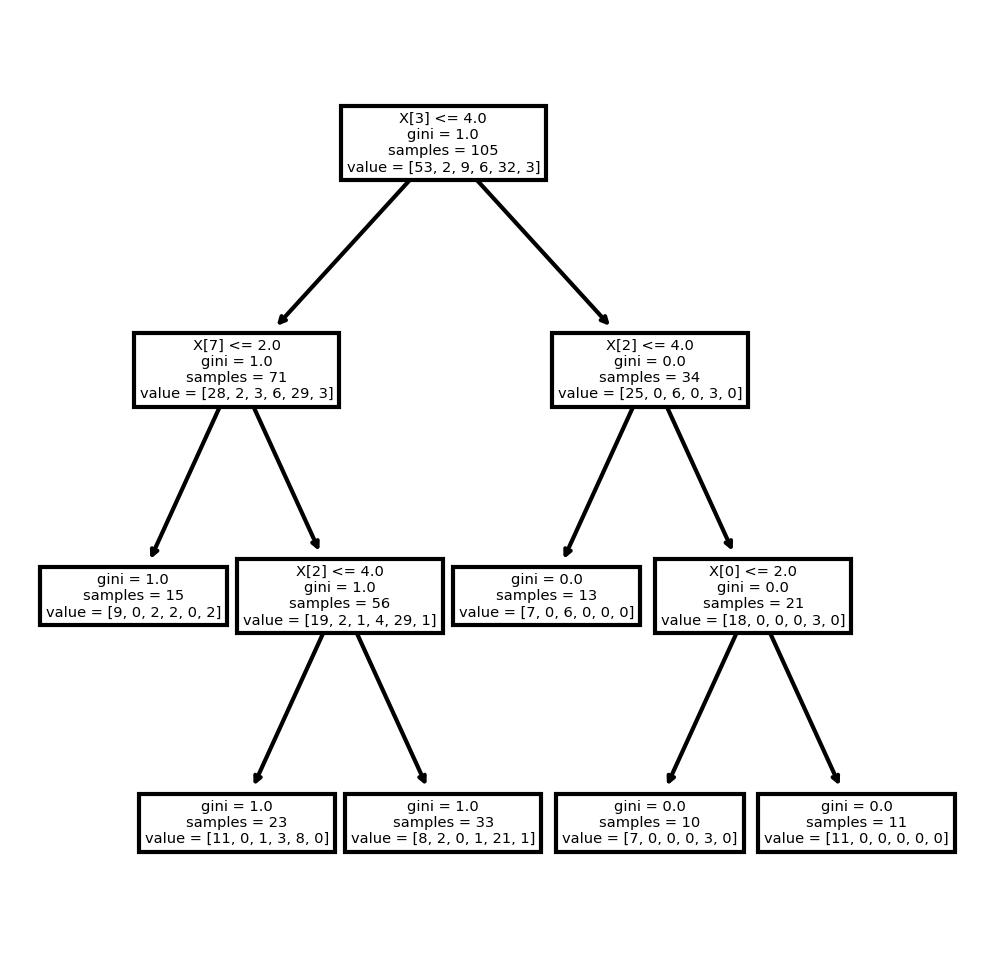

In [229]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf)
tree.plot_tree(clf_gini, precision=0)

In [230]:
# RMSE

In [231]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [232]:
y_predicted = clf_entropy.predict(X)
y_predicted

array([1., 1., 1., 1., 1., 6., 6., 1., 1., 1., 6., 1., 1., 1., 3., 1., 1.,
       1., 1., 1., 6., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 6.,
       1., 1., 6., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 1., 6., 1., 1., 6., 6., 6., 6., 6., 1., 1., 1., 6., 1., 6.,
       6., 1., 1., 1., 6., 1., 1., 1., 1., 1., 6., 1., 1., 3., 1., 3., 6.,
       3., 6., 6., 3., 3., 3., 6., 6., 3., 3., 3., 3., 1., 1., 3., 1., 3.,
       1., 6., 1., 1., 1., 1., 6., 1., 6., 1., 6., 1., 1., 1., 1., 6., 1.,
       1., 1., 1., 1., 1., 1., 1., 6., 6., 6., 1., 3., 1., 3.])

In [233]:
rms = sqrt(mean_squared_error(Y, y_predicted))
rms

2.663331247391757

In [234]:
rmse = sqrt(mean_squared_error(Y, y_predicted,squared=False))
rmse

1.6319715828995789

In [235]:
# MAE

In [236]:
from sklearn.metrics import mean_absolute_error

In [237]:
mae = mean_absolute_error(Y,y_predicted)
mae

1.56

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)


C:\Users\90536\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [239]:
 
predictions = logmodel.predict(X_test)
predictions



array([1., 1., 1., 1., 1., 6., 1., 1., 1., 1., 1., 6., 1., 1., 6., 7., 1.,
       6., 1., 5., 6., 1., 6., 6., 1., 3., 1., 6., 1., 1., 1., 5., 1., 1.,
       1., 1., 1., 6., 6., 5., 1., 5., 3., 6., 1.])

In [240]:

d=X_test.to_numpy()
temp =[]
for i in range(len(X_test)):
    temp.append(predictions[i])
#     print(d[i],"$$$$$$",new_output[i])
# temp


In [241]:
X_test["final"]=temp
X_test.head(92)

C:\Users\90536\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ComputerSkills2,MedicalSkills2,BankingSkills2,MathsMarks,PhysicsMarks,ComputerMarks,BiologyMarks,AccountingMarks,ComputerSkills,LawSkills,ChemistryMarks,PoliticsSkills,final
128,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,5.0,3.0,2.0,3.0,1.0
11,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,3.0,2.0,1.0
118,2.0,1.0,1.0,5.0,5.0,4.0,4.0,4.0,3.0,1.0,5.0,3.0,1.0
15,2.0,2.0,3.0,5.0,5.0,5.0,0.0,0.0,4.0,2.0,5.0,3.0,1.0
123,1.0,1.0,5.0,4.0,4.0,4.0,0.0,3.0,5.0,1.0,2.0,2.0,1.0
135,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0
32,2.0,2.0,2.0,3.0,3.0,5.0,1.0,1.0,4.0,2.0,1.0,3.0,1.0
1,2.0,4.0,4.0,5.0,5.0,0.0,5.0,0.0,4.0,4.0,5.0,4.0,1.0
116,3.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0
45,1.0,4.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,2.0,5.0,3.0,1.0


In [242]:

#print(classification_report(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

0.6888888888888889


In [243]:
predictions[29]

1.0

In [244]:
params = logmodel.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [245]:
print('Intercept: \n', logmodel.intercept_)


Intercept: 
 [-1.06173315 -8.97626718 -1.39201902  5.87532775 -0.34703781  5.90172941]


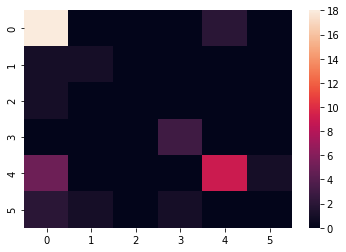

In [246]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)))
plt.show()

In [247]:
# RMSE

In [248]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [249]:
y_predicted = logmodel.predict(X)
y_predicted


array([1., 1., 1., 1., 1., 5., 6., 1., 1., 1., 1., 1., 1., 1., 6., 1., 1.,
       1., 6., 6., 6., 1., 1., 1., 1., 1., 1., 1., 1., 6., 6., 1., 1., 1.,
       1., 1., 6., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 6.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 6., 1., 6., 6., 6., 6., 6., 1., 6., 1., 6.,
       6., 1., 3., 1., 6., 5., 5., 5., 5., 3., 6., 1., 7., 6., 5., 3., 6.,
       3., 6., 6., 6., 6., 6., 6., 6., 3., 3., 5., 3., 5., 6., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 6., 1., 6., 1., 6., 6., 6., 1., 1., 6., 6.,
       6., 6., 6., 7., 5., 2., 1., 6., 6., 6., 6., 3., 5., 3.])

In [250]:
rms = sqrt(mean_squared_error(Y, y_predicted))
rms

2.219609575278199

In [251]:
rmse = sqrt(mean_squared_error(Y, y_predicted,squared=False))
rmse

1.489835418856123

In [252]:
# MAE

In [253]:
from sklearn.metrics import mean_absolute_error

In [254]:
mae = mean_absolute_error(Y,y_predicted)
mae

1.0466666666666666